# Tableau de bord macro

Ce notebook charge le panel `macro_panel.parquet` et trace quelques indicateurs clefs pour validation rapide.


In [10]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd

panel_path = Path("..") / "data" / "processed" / "macro_panel.parquet"
panel = pd.read_parquet(panel_path)
panel.tail()


,ecb_main_refi,it_manufacturing_confidence,fr_manufacturing_pmi,de_ifo_business_climate,jp_jobless_rate,us_fed_funds_upper,us_michigan_sentiment,ea_economic_sentiment,fr_cpi_yoy,us_nfp_change,jp_industrial_production_mom,us_initial_claims,us_cpi_mom,us_ism_manufacturing,ea_cpi_yoy,us_gdp_qoq,de_zew_expectations,jp_gdp_qoq
date,,,,,,,,,,,,,,,,,,
2025-11-10,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-11-11,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-11-12,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-11-13,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-11-14,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


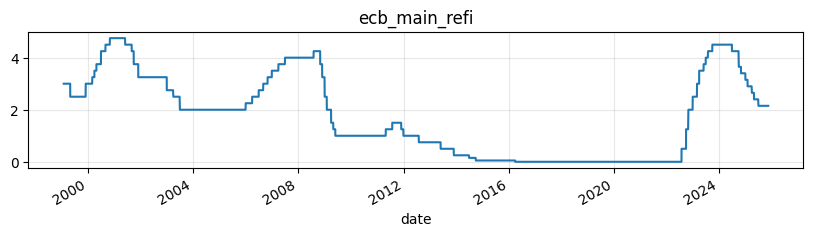

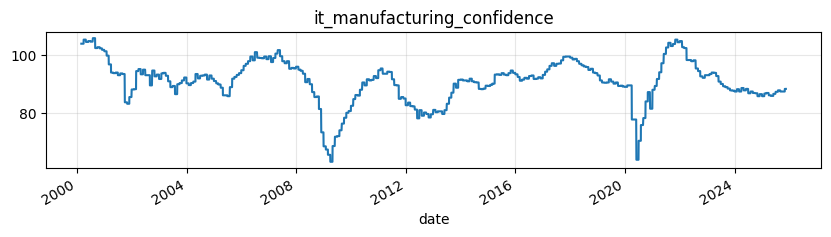

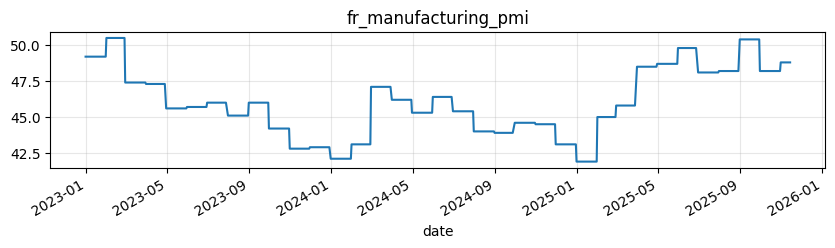

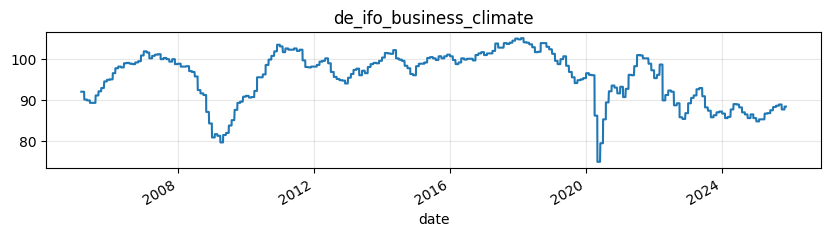

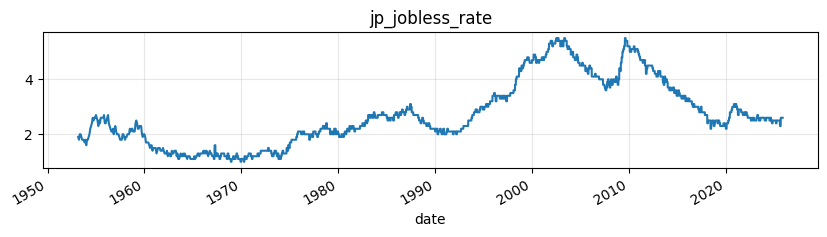

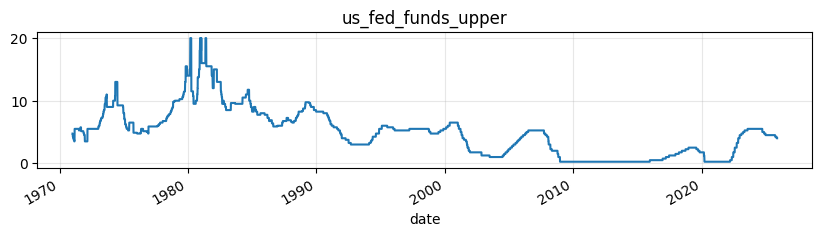

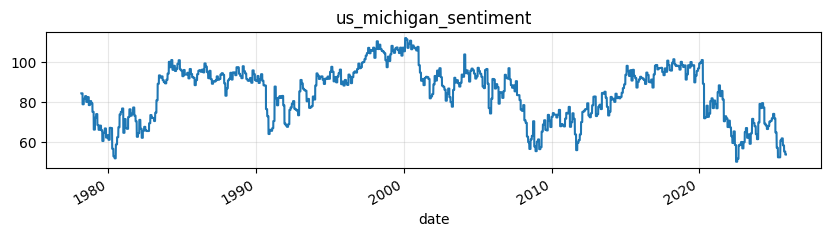

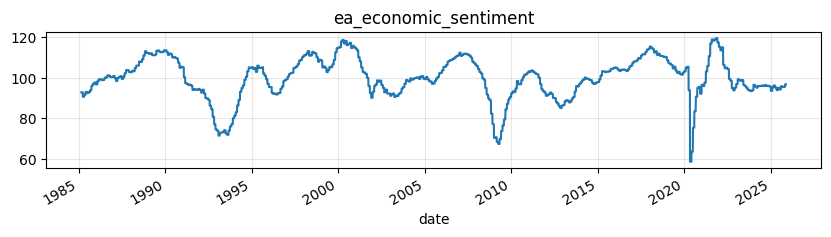

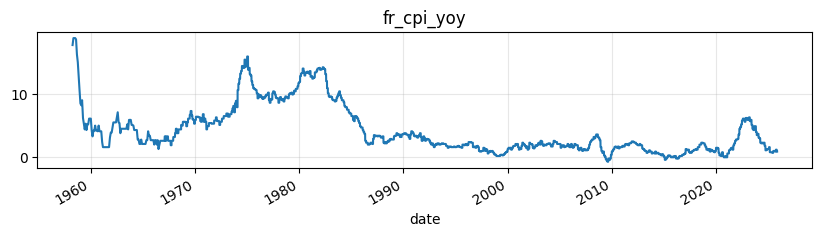

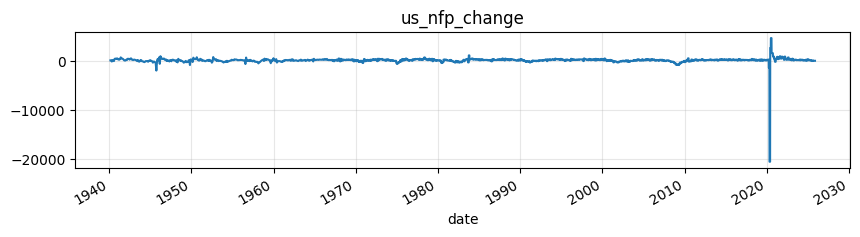

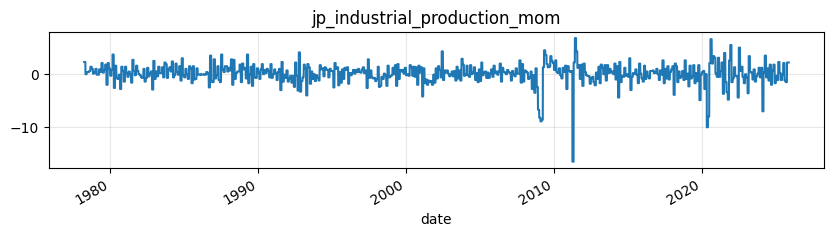

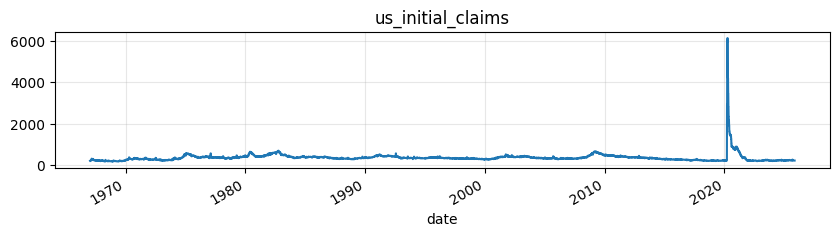

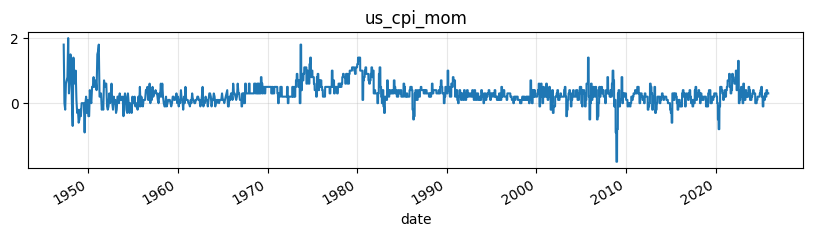

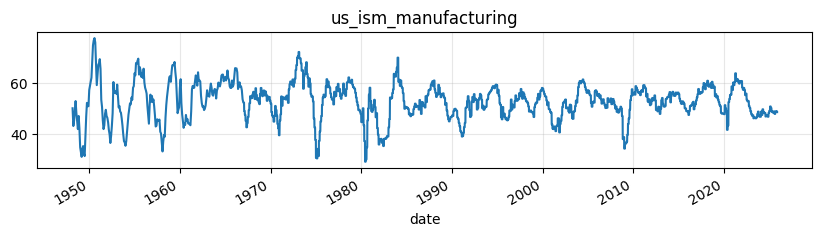

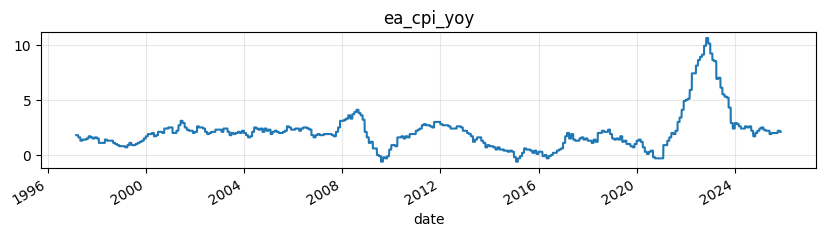

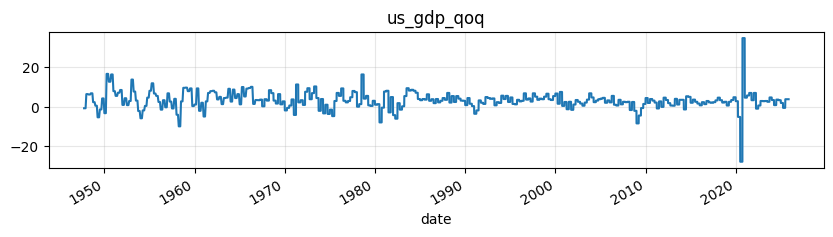

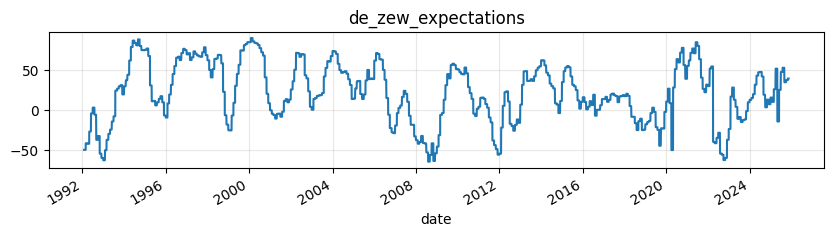

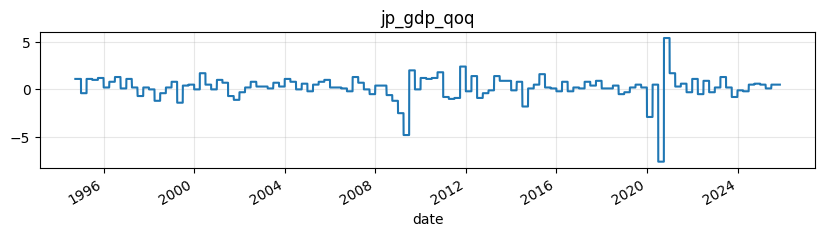

In [20]:
selected_cols = [
    col for col in panel.columns[:6]
]

fig, axes = plt.subplots(len(selected_cols), 1, figsize=(10, 2 * len(selected_cols)), sharex=True)
for ax, col in zip(axes, selected_cols):
    panel[col].plot(ax=ax, title=col)
    ax.grid(True, alpha=0.3)
fig.tight_layout()
fig


In [15]:
for col in panel.columns:
    non_null = panel[col].dropna()
    if non_null.empty:
        print(f"{col}: aucune observation")
    else:
        print(f"{col}: {non_null.index.min().date()} -> {non_null.index.max().date()} ({len(non_null)} points)")


ecb_main_refi: 1999-01-29 -> 2025-10-31 (322 points)
it_manufacturing_confidence: 2000-02-29 -> 2025-10-31 (308 points)
fr_manufacturing_pmi: 2022-12-31 -> 2025-10-31 (35 points)
de_ifo_business_climate: 2005-02-28 -> 2025-10-31 (249 points)
jp_jobless_rate: 1953-02-28 -> 2025-09-30 (872 points)
us_fed_funds_upper: 1971-01-04 -> 2025-11-14 (14177 points)
us_michigan_sentiment: 1978-02-28 -> 2025-10-31 (573 points)
ea_economic_sentiment: 1985-02-28 -> 2025-10-31 (489 points)
fr_cpi_yoy: 1958-03-31 -> 2025-10-31 (812 points)
us_nfp_change: 1940-02-29 -> 2025-08-31 (1027 points)
jp_industrial_production_mom: 1978-03-31 -> 2025-09-30 (571 points)
us_initial_claims: 1967-01-13 -> 2025-09-19 (3063 points)
us_cpi_mom: 1947-03-31 -> 2025-09-30 (943 points)
us_ism_manufacturing: 1948-02-29 -> 2025-10-31 (933 points)
ea_cpi_yoy: 1997-02-28 -> 2025-10-31 (345 points)
us_gdp_qoq: 1947-09-30 -> 2025-06-30 (312 points)
de_zew_expectations: 1992-01-31 -> 2025-10-31 (406 points)
jp_gdp_qoq: 1994-09-30

In [16]:
panel.describe().T


,count,mean,std,min,25%,50%,75%,max
ecb_main_refi,322.0,1.744410,1.576260,0.00,0.050,1.50,3.225,4.75
it_manufacturing_confidence,308.0,90.868182,7.261879,63.30,87.625,91.60,94.725,105.70
fr_manufacturing_pmi,35.0,46.051429,2.377761,41.90,44.350,45.80,48.150,50.50
de_ifo_business_climate,249.0,95.520884,6.146377,75.00,90.800,97.70,100.100,105.00
jp_jobless_rate,872.0,2.715023,1.179228,1.00,2.000,2.50,3.400,5.50
us_fed_funds_upper,14177.0,4.890749,3.766675,0.25,1.750,5.13,6.750,20.00
us_michigan_sentiment,573.0,84.252356,13.604793,50.00,73.400,88.20,94.400,112.00
ea_economic_sentiment,489.0,99.877710,10.119312,58.50,94.700,100.00,106.400,119.60
fr_cpi_yoy,812.0,4.182759,3.829260,-0.70,1.600,2.60,5.800,18.80
us_nfp_change,1027.0,124.573515,705.959749,-20471.00,25.500,159.00,265.500,4631.00
